Travel Recommendation System

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
tourism=pd.read_csv('tourism.csv')
rating=pd.read_csv('rating.csv')
user=pd.read_csv('user.csv')

In [109]:
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5


In [110]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [111]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [112]:
num_places = len(tourism['Place_Id'].unique())
print("Number of places in the dataset:", num_places)

num_users = len(user['User_Id'].unique())
print("Number of users:", num_users)

num_ratings = len(rating)
print("Total number of ratings:", num_ratings)


Number of places in the dataset: 437
Number of users: 300
Total number of ratings: 10000


In [113]:
tourism.shape


(437, 6)

In [114]:
user.shape

(300, 3)

In [115]:
rating.shape

(10000, 3)

In [116]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Rating       437 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 20.6+ KB


In [117]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [118]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [119]:
tourism.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Rating         0
dtype: int64

In [120]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [121]:
user.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [122]:
import numpy as np
tourism_all = np.union1d(tourism['Place_Id'].unique(), rating['Place_Id'].unique())
total_tourism = len(tourism_all)
print("Total number of tourism:",total_tourism)

Total number of tourism: 437


In [123]:
all_tourism_rate = rating.copy()
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [124]:
all_tourism = pd.merge(all_tourism_rate,tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [125]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


In [126]:
all_tourism.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [127]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [128]:
prep = all_tourism.drop_duplicates(subset='Place_Id')
prep

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [129]:
place_id, place_name, place_category, place_desc, place_city, city_category = prep[['Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'city_category']].values.T.tolist()

In [130]:
tourism_new = pd.DataFrame({
    "id": prep['Place_Id'],
    "name": prep['Place_Name'],
    "category": prep['Category'],
    "description": prep['Description'],
    "city": prep['City'],
    "city_category": prep['city_category']
})
tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
2008,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
2399,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
2448,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
2534,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


In [131]:
pip install Scikit-learn

You should consider upgrading via the 'c:\Users\sai priyanka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


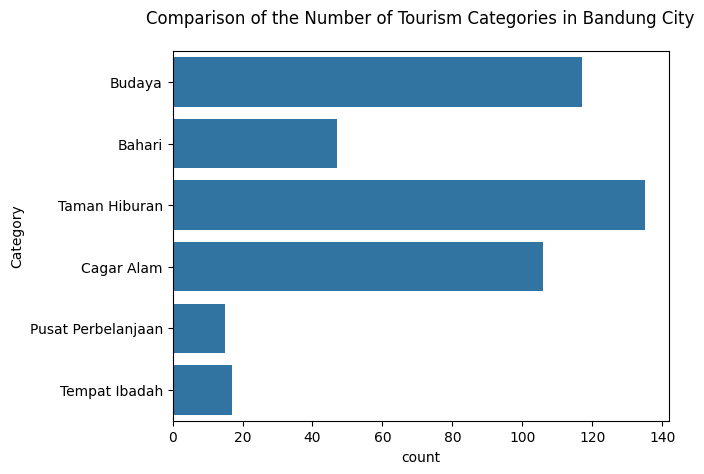

In [132]:
sns.countplot(y='Category', data=prep)
plt.title('Comparison of the Number of Tourism Categories in Bandung City', pad=20)
plt.show()

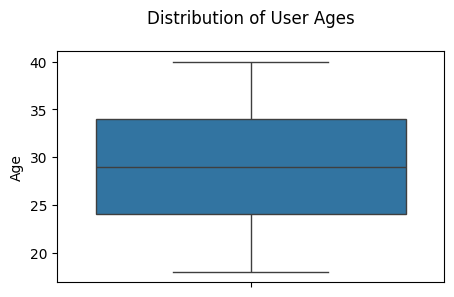

In [133]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribution of User Ages', pad=20)
plt.show()

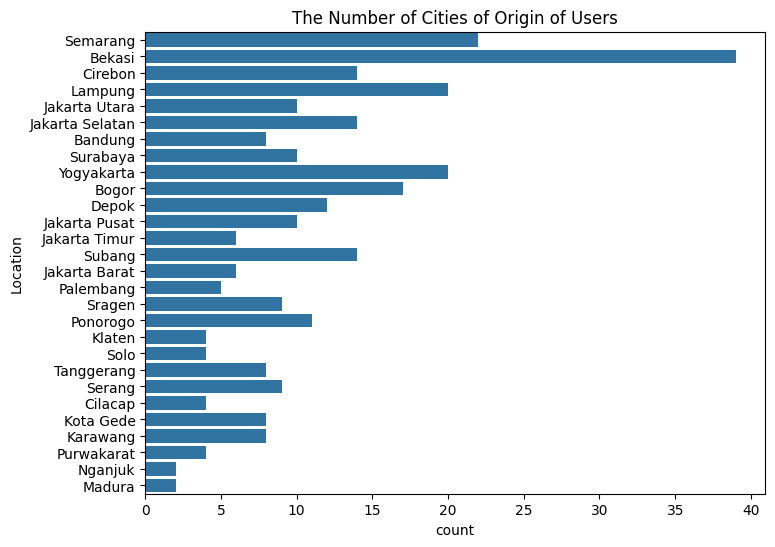

In [134]:
City_of_Origin= user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=City_of_Origin)
plt.title('The Number of Cities of Origin of Users')
plt.show()

In [135]:
ds = tourism_new
ds.sample(5)

,id,name,category,description,city,city_category
270,236,Taman Balai Kota Bandung,Taman Hiburan,Taman Balai Kota Bandung merupakan sebuah tama...,Bandung,Bandung Taman Hiburan
134,301,Lereng Anteng Panoramic Coffee Place,Cagar Alam,Lereng Anteng Panoramic Coffee adalah sebuah t...,Bandung,Bandung Cagar Alam
76,249,Upside Down World Bandung,Taman Hiburan,Upside Down World Bandung pertama kali dibuka ...,Bandung,Bandung Taman Hiburan
225,267,Panama Park 825,Taman Hiburan,Panama Park Bandung menjadi salah satu tempat ...,Bandung,Bandung Taman Hiburan
232,196,Pantai Ngrenehan,Bahari,Pantai Ngrenehan merupakan\npantai nelayan. Te...,Yogyakarta,Yogyakarta Bahari


In [136]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(ds['city_category'])
print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [137]:
cv_matrix = cv.transform(ds['city_category']) 
cv_matrix.shape

(437, 15)

In [138]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [139]:
df = pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index=ds['name']
)
df.sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Pantai Baron,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Kampoeng Rawa,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
Museum Kereta Ambarawa,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Food Junction Grand Pakuwon,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
Keraton Yogyakarta,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [140]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(cv_matrix)
cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [141]:
cosine_sim = pd.DataFrame(cosine,index=ds['name'],columns=ds['name'])
cosine_sim.sample(5,axis=1).sample(10,axis=0)

name,Jembatan Pasupati,Museum Sepuluh Nopember Kota Surabaya,Kampung Wisata Rejowinangun,Galeri Nasional Indonesia,Sam Poo Kong Temple
name,,,,,
Pintoe Langit Dahromo,0.000000,0.0,0.408248,0.0,0.0
Wisata Kaliurang,0.000000,0.0,0.408248,0.0,0.0
Panama Park 825,1.000000,0.0,0.000000,0.0,0.0
Taman Sungai Mudal,0.000000,0.0,0.408248,0.0,0.0
Bendung Lepen,0.666667,0.0,0.408248,0.0,0.0
Green Village Gedangsari,0.666667,0.0,0.408248,0.0,0.0
Kampoeng Tulip,1.000000,0.0,0.000000,0.0,0.0
Pulau Pari,0.000000,0.0,0.000000,0.5,0.0
Pantai Nglambor,0.000000,0.0,0.500000,0.0,0.0


In [142]:
def tourism_recommendations(place_name,similarity_data=cosine_sim,items=ds[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [143]:
tourism_recommendations("SnowBay Waterpark")

,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta


In [144]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sai priyanka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [145]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [146]:
df = rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [147]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [148]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [149]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [150]:
num_users = len(user_to_user_encoded)
num_place = len(place_encoded_to_place)
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
min_rating = min(df['Place_Ratings'])
max_rating= max(df['Place_Ratings'])
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [151]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [152]:
x = df[['user','place']].values
y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values
train_indices = int(0.8 * df.shape[0])
x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [153]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) 


In [154]:
model = RecommenderNet(num_users, num_place, 100)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [155]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6951 - root_mean_squared_error: 0.3464 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3474
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6884 - root_mean_squared_error: 0.3428 - val_loss: 0.6986 - val_root_mean_squared_error: 0.3486
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6826 - root_mean_squared_error: 0.3359 - val_loss: 0.6969 - val_root_mean_squared_error: 0.3474
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6772 - root_mean_squared_error: 0.3329 - val_loss: 0.6968 - val_root_mean_squared_error: 0.3473
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6749 - root_mean_squared_error: 0.3342 - val_loss: 0.6995 - val_root_mean_squared_error: 0.3492
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6724 - root_mean_squared_error: 0.3286 - val_loss: 0.7000 - val_root_mean_squared_error: 0.3494
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 

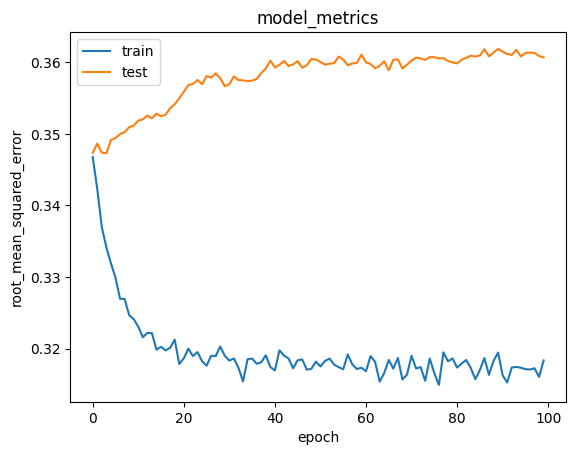

In [156]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
place_df = tourism_new
df = pd.read_csv('rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [158]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))

print('Place with high ratings from user :')

 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Showing recommendations for users: 280
Place with high ratings from user :


,id,name,category,description,city,city_category
189,99,Kampung Wisata Kadipaten,Budaya,Kampung Wisata Kadipaten secaara kewilayahan b...,Yogyakarta,Yogyakarta Budaya
208,98,Taman Pelangi Yogyakarta,Taman Hiburan,Taman Pelangi Yogyakarta merupakan tempat wisa...,Yogyakarta,Yogyakarta Taman Hiburan
295,430,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya,Surabaya Taman Hiburan
493,199,Pantai Sedahan,Bahari,Pantai Sedahan ini memiliki garis pantai yang ...,Yogyakarta,Yogyakarta Bahari
578,165,Green Village Gedangsari,Taman Hiburan,Wisata Green Village Gedangsari Gunungkidul me...,Yogyakarta,Yogyakarta Taman Hiburan


In [159]:
print('Top 10 place recommendation')
recommended= place_df[place_df['id'].isin(recommended_place_ids)]
recommended

Top 10 place recommendation


,id,name,category,description,city,city_category
16,67,Margasatwa Muara Angke,Cagar Alam,Suaka margasatwa Muara Angke adalah sebuah kaw...,Jakarta,Jakarta Cagar Alam
159,243,Kampung Korea Bandung,Budaya,Kampung Korea adalah sebuah kawasan di kota Ba...,Bandung,Bandung Budaya
173,224,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung,Bandung Taman Hiburan
254,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
284,230,Stone Garden Citatah,Taman Hiburan,"Stone Garden, adalah sebutan nama untuk hampa...",Bandung,Bandung Taman Hiburan
346,52,Kampung Cina,Budaya,KAMPUNG China adalah hunian dan kawasan perdag...,Jakarta,Jakarta Budaya
701,60,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Jakarta Budaya
949,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari
965,231,The Great Asia Africa,Taman Hiburan,Kota Bandung tampaknya tidak pernah kehabisan ...,Bandung,Bandung Taman Hiburan
1463,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam


In [160]:
import joblib

In [161]:
joblib.dump(cosine_sim,'COSINE_SIMILARITY.pkl')

['COSINE_SIMILARITY.pkl']

In [162]:
items=ds[['name','category','description','city']]

In [163]:
joblib.dump(items,'DATA_ITEMS.pkl')

['DATA_ITEMS.pkl']

In [164]:
import joblib
import pandas as pd
cosine=joblib.load('COSINE_SIMILARITY.pkl')
item=joblib.load('DATA_ITEMS.pkl')
def tourism_recommendations(place_name):
    try:
        k=5
        similarity_data=cosine
        items=item
        index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        closest = closest.drop(place_name,errors='ignore')
        df=pd.DataFrame(closest).merge(items).head(k)
        return df
    except KeyError:
        return "Sorry!No data found"

In [166]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)

SnowBay Waterpark


,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta


In [167]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)

dubai


'Sorry!No data found'